## 5.1T DNN Intro

This uses the TF Low-level API to do a MLP (Multi-Layer Perceptron) with hidden layers. 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
from IPython.display import Image
%matplotlib inline


In [4]:
# import on colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB == True:
    !pip install -U tensorboardcolab
    from tensorboardcolab import *
    tbc=TensorBoardColab()
else:
    tf.summary.FileWriterCache.clear()


## Training neural networks efficiently with low-level TensorFlow APIs

In [3]:
## Step 1: Load MNIST data



# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Create the Network



In [4]:
# These can be changed if we want.


n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)


In [5]:
# These are our variables and placeholders


# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])
logs_path = '/tmp/tensorflow_logs/example/' #path for writing Tensorboard logs 

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Add summaries to collect information needed for tensorboard
tf.summary.histogram("Weight_h1", weights['h1'])
tf.summary.histogram("Weight_h2", weights['h2'])
tf.summary.histogram("Weight_out", weights['out'])

tf.summary.histogram("Bias_b1", biases['b1'])
tf.summary.histogram("Bias_b2", biases['b2'])
tf.summary.histogram("Bias_out", biases['out'])



Instructions for updating:
Colocations handled automatically by placer.


<tf.Tensor 'Bias_out:0' shape=() dtype=string>

In [6]:
# This is our model definition.

# Note: 2 x Densely Connected Layers + 1 x Output Layer


# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = multilayer_perceptron(X)


## Train the Model

In [7]:

# HyperParameters (Change these if you want)
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1


In [8]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

pred = tf.nn.softmax(logits)  # Apply softmax to logits
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

tf.summary.scalar("loss", loss_op)
tf.summary.scalar("acc", accuracy)
merge=tf.summary.merge_all()

# Initializing the variables
init = tf.global_variables_initializer()

epochs = []
losses = []

with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph()) #write the logs 

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c, summary = sess.run([train_op, loss_op, merge], feed_dict={X: batch_x,
                                                            Y: batch_y})
            
            summary_writer.add_summary(summary, i )# adding data to logs in every iteration in local path
            
# adding data to logs in every iteration on google colab
            try:
                import google.colab
                IN_COLAB = True
            except:
                IN_COLAB = False
            if IN_COLAB == True:
                summary_writer = tbc.get_writer()# saving data on google colab
                summary_writer.add_graph(sess.graph)
                
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        epochs.append(epoch+1)
        losses.append(avg_cost)
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "loss={:.9f}".format(avg_cost))
    print("Training Finished!")
    # Test mode
    pred = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))

    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    accuracy_out =  accuracy.eval({X: mnist.test.images, Y: mnist.test.labels})



Epoch: 0001 loss=309.225210908
Epoch: 0002 loss=96.489007693
Epoch: 0003 loss=71.735375030
Epoch: 0004 loss=57.692321108
Epoch: 0005 loss=49.393147227
Epoch: 0006 loss=43.412567400
Epoch: 0007 loss=38.950319502
Epoch: 0008 loss=34.562464377
Epoch: 0009 loss=33.165810526
Epoch: 0010 loss=29.772862940
Epoch: 0011 loss=27.558153873
Epoch: 0012 loss=25.863567944
Epoch: 0013 loss=24.388858417
Epoch: 0014 loss=22.994724486
Epoch: 0015 loss=21.931855302
Training Finished!


Text(0.5, 1.0, 'Loss Curve')

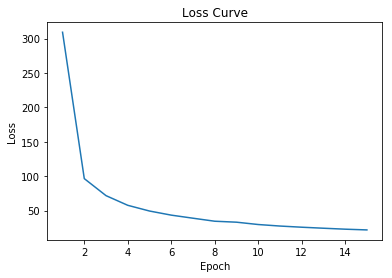

In [9]:
plt.plot(epochs, losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")

In [10]:
## Evaluate the Model

print("Accuracy:", accuracy_out)


Accuracy: 0.8964


## Improvements

Oops! Our accuracy was less than the linear model!  How can that be?

Well, our first attempt might actually be worse.  It's time to make some improvements. This is your turn.

First, we may want to run for more epochs.

We might also want to adjust hyperparameters such as learning rate and batch size.

### Now we run the TensorBaord
#### Local:

Now run the following command on a bash

```bash
$ tensorboard --logdir=/tmp/tensorflow_logs
```
Then open the browser(Chrome) and insert this address

```bash
localhost:6006
```

#### Google colab



Click on the link you had got at the first step

![](../images/tb_colab.png)